In [1]:
%pip install numpy scipy pingouin

In [1]:
%matplotlib inline

# T-Tests with Pingouin

**Scipy.Stats** has all the stats functions you know and love from stats class!

[**Pingouin**](https://pingouin-stats.org/index.html) does, too!  Pingouin is a new statistics package in Python that combines pandas and scipy-stats.





### T-Tests

T-tests compare the means of two samples of data generated from a normally-distributed population and compute the probability that they have the same mean. Both packages have functions for t-tests! 


| Test, | `scipy.stats` Function, | `pengouin` Function |
| :---: | :---: | :---: |
| One-Sampled T-Test | `stats.ttest_1samp(x, 0)` | `pg.ttest(x, 0)` |
| Independent T-Test | `stats.ttest_ind(x, y)` | `pg.ttest(x,y)` |
| Paired T-test | `stats.ttest_rel(x, y)` | `pg.ttest(x, y, paired=True)`
| Pairwise T-tests |   | `pg.pairwise_ttests(padjust='fdr_bh')`


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

**Exercises** let's do some analysis on some fake data to get a feel for these two statistics tools.

Generate the Data: Run the code below to create the dataset `df`.

In [3]:
randomizer = np.random.RandomState(17)  # Makes sure the pseudorandom number generators reproduce the same data for us all.
df = pd.DataFrame()
df['A'] = randomizer.normal(0, 1, size=20)
df['B'] = randomizer.normal(0.2, 1, size=20)
df['C'] = randomizer.normal(0.7, 1, size=20)
df['D'] = df.A * 0.3 + randomizer.normal(0, 0.3, size=20)
df.head()

,A,B,C,D
0,0.276266,-0.782294,-0.455413,0.013768
1,-1.854628,1.231269,4.045157,-0.520330
2,0.623901,0.691334,0.826727,-0.049371
3,1.145311,-0.246647,0.005821,-0.544443
4,1.037190,-0.606360,1.257674,0.072483


<AxesSubplot: >

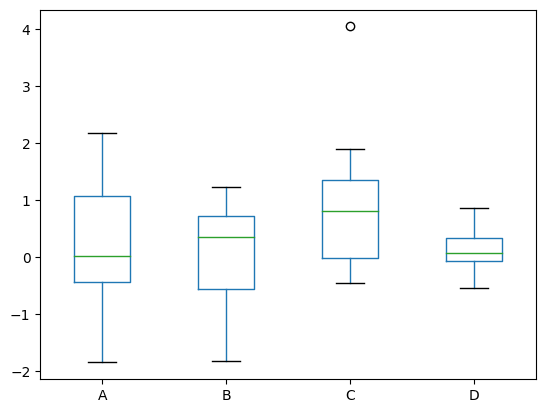

In [19]:
df.boxplot(grid=False)

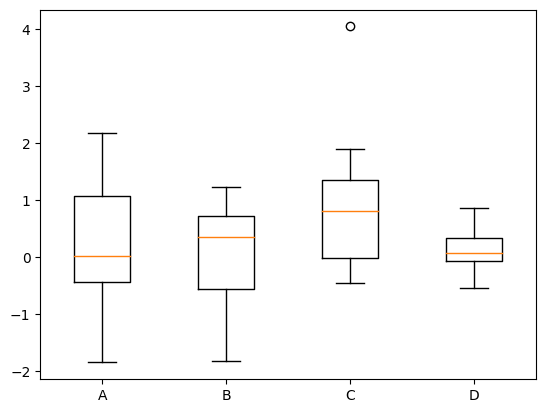

In [18]:
plt.boxplot(df, labels=df.columns);

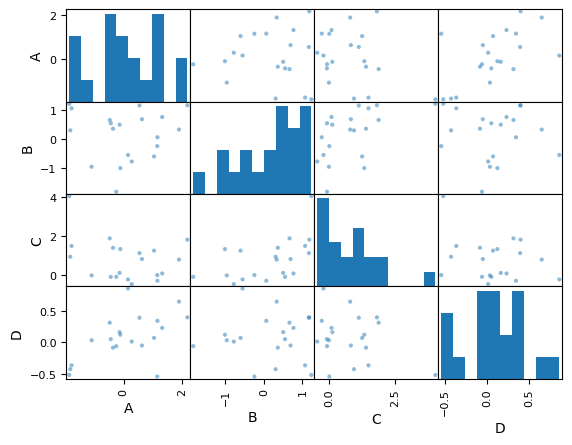

In [11]:
pd.plotting.scatter_matrix(df);

In [12]:
import pingouin as pg

Analyze the Data with Pairwise Tests

**(first do the questions in a section with scipy stats, then do the section with penguoin before moving on to the next section)**. 

**A vs 0, One-Sampled T-Test**: Is the mean of the normally-distributed population that the the dataset A is generated from unlikely to be zero?

**Example**: with `scipy.stats`:

In [13]:
stats.ttest_1samp(df['A'], 0)

Ttest_1sampResult(statistic=0.3786524387290047, pvalue=0.7091439229698686)

**Example:** with `pingouin`:

In [14]:
pg.ttest(df['A'], 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.378652,19,two-sided,0.709144,"[-0.45, 0.65]",0.084669,0.248,0.064966


**B vs 1, One-Sampled T-Test**: Is the mean of the normally-distributed population that the the dataset B is generated from unlikely to be one?

with `scipy.stats`:

with `pingouin`:

**A vs B, Independent Samples T-Test**: Is the mean of the normally-distributed population that the the dataset `A` is generated from unlikely to be the same as the mean of the normally-distributed population that the the dataset `B` is generated from?

with `scipy.stats`:

with `pingouin`:

**A vs C, Independent Samples T-Test**: Is the mean of the normally-distributed population that the the dataset `A` is generated from unlikely to be the same as the mean of the normally-distributed population that the the dataset `C` is generated from?

with `scipy.stats`:

with `pingouin`:

**A vs C, Paired Samples T-Test**: Is the mean of the differences between each pair of samples in generated from the two normally-distributed populations `A` and `C`  unlikely to be 0?

with `scipy.stats`:

with `pingouin`:

**A vs D, Paired Samples T-Test**: Is the mean of the differences between each pair of samples in generated from the two normally-distributed populations `A` and `D`  unlikely to be 0?

with `scipy.stats`:

with `pingouin`:

*After doing the above section with `pingouin`: The paired t-test is equivalent to a one-sample ttest against 0 for some statistics, but not others.  What values are different?  Compare the results below comparing A and D to the ones you generated above:

**Demo**

It is also possible to have `pingouin` simply do all the comparisons between the groups.  Below is a demo.  Notice that for this, the data has to be reorganized a bit first.  We will be exploring this reorganization in the future...it is very useful!

In [149]:
dfl = df.rename_axis(index='index').melt(ignore_index=False).reset_index()
dfl

,index,variable,value
0,0,A,0.496714
1,1,A,-0.138264
2,2,A,0.647689
3,3,A,1.523030
4,4,A,-0.234153
...,...,...,...
75,15,D,0.242265
76,16,D,-0.260326
77,17,D,-0.055229
78,18,D,-0.226527


**Example**: A table of All pairwise comparisons, both paired and unpaired, with different p-value corrections:

In [150]:
pd.concat([
    pg.pairwise_tests(dfl, dv='value', between='variable', subject='index', padjust='bonf'),
    pg.pairwise_tests(dfl, dv='value', within='variable', subject='index', padjust='fdr_bh'),  
])

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,variable,A,B,False,True,0.310561,38.0,two-sided,0.757832,1.000000,bonf,0.321,0.096257
1,variable,A,C,False,True,-2.282285,38.0,two-sided,0.028159,0.168954,bonf,2.28,-0.707383
2,variable,A,D,False,True,-0.407867,38.0,two-sided,0.685660,1.000000,bonf,0.33,-0.126416
3,variable,B,C,False,True,-2.604917,38.0,two-sided,0.013045,0.078273,bonf,4.051,-0.807381
4,variable,B,D,False,True,-0.773855,38.0,two-sided,0.443804,1.000000,bonf,0.392,-0.239853
5,variable,C,D,False,True,2.349824,38.0,two-sided,0.024079,0.144473,bonf,2.559,0.728316
0,variable,A,B,True,True,0.288686,19.0,two-sided,0.775948,0.775948,fdr_bh,0.241,0.096257
1,variable,A,C,True,True,-1.962888,19.0,two-sided,0.064469,0.128938,fdr_bh,1.141,-0.707383
2,variable,A,D,True,True,-0.527742,19.0,two-sided,0.603788,0.724546,fdr_bh,0.263,-0.126416
3,variable,B,C,True,True,-2.755894,19.0,two-sided,0.012573,0.075439,fdr_bh,4.236,-0.807381


**Example**: A table of all pairwise correlations, with three different correlation methods used:

In [151]:
pd.concat([
    pg.pairwise_corr(df),
    pg.pairwise_corr(df, method='spearman'),
    pg.pairwise_corr(df, method='kendall'),
]).sort_values(['X', 'Y'])

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,A,B,pearson,two-sided,20,-0.157294,"[-0.56, 0.31]",0.507787,0.34,0.101785
0,A,B,spearman,two-sided,20,-0.120301,"[-0.53, 0.34]",0.613418,NaN,0.079463
0,A,B,kendall,two-sided,20,-0.042105,"[-0.48, 0.41]",0.822683,NaN,0.052875
1,A,C,pearson,two-sided,20,-0.356238,"[-0.69, 0.1]",0.123158,0.842,0.347899
1,A,C,spearman,two-sided,20,-0.311278,"[-0.66, 0.15]",0.181576,NaN,0.272998
1,A,C,kendall,two-sided,20,-0.242105,"[-0.62, 0.22]",0.145844,NaN,0.179664
2,A,D,pearson,two-sided,20,0.441910,"[-0.0, 0.74]",0.051079,1.64,0.515369
2,A,D,spearman,two-sided,20,0.245113,"[-0.22, 0.62]",0.297601,NaN,0.183153
2,A,D,kendall,two-sided,20,0.157895,"[-0.31, 0.56]",0.351395,NaN,0.102203
3,B,C,pearson,two-sided,20,0.108019,"[-0.35, 0.53]",0.650333,0.305,0.073491


**Example**: ANOVA

In [152]:
pg.anova(dfl, dv='value', between='variable', detailed=True)

/home/nickdg/miniconda3/envs/py10/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,Source,SS,DF,MS,F,p-unc,np2
0,variable,6.567354,3,2.189118,3.002379,0.035633,0.105957
1,Within,55.413708,76,0.729128,NaN,NaN,NaN


## Further Reading

Nice article on Pingouin here: https://towardsdatascience.com/the-new-kid-on-the-statistics-in-python-block-pingouin-6b353a1db57c

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61a4b91b-9261-42f0-a4f5-a139c5d33a06' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>